<a href="https://colab.research.google.com/github/rubyvanrooyen/observation_planning/blob/main/comet67P/67P_calculations_for_MeerKAT_observations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy import constants as const

# Comet angular diameter 

$d/2 = D\tan(\delta/2)$    
with:
* $\delta$ the angular diameter ($\delta/2$ the angular radius),
* $D$ the distance to the object and
* $d$ the actual diameter of the object ($d/2$ the object radius).

Angular radius equals half of the angular diameter with 
$\rho = \arctan (r/D) \approx \frac{r}{D} \mbox{ if } r \ll D$

In [ ]:
def angular_size(D, r):
    frac = r/D.to(u.km)
    rho = np.arctan(frac)
    d = 2.*rho
    d = (2.*rho).to(u.arcsec)
    print(f'Object with diameter {2.*r} has angular size {d:.3f} @ geocentric distance {D}')

# nucleocentric distance
r = 200 * u.km

# geocentric distance
D = 0.5 * u.au
angular_size(D, r)

# geocentric distance
D = 1. * u.au
angular_size(D, r)

Object with diameter 400.0 km has angular size 1.103 arcsec @ geocentric distance 0.5 AU
Object with diameter 400.0 km has angular size 0.552 arcsec @ geocentric distance 1.0 AU


Models for `OH` detected in comets indicates nucleocentric distances out to $2000\,$km.
From what I understand `67P` is not a very large comet and it seems to be $\lt 200\,$km, which is an order of magnitude smaller.

It is a cruel irony that the MeerKAT resolution @ $1666\,$MHz $\approx 5''$, which would have the possibility of resolving the OH masers for a larger comet with nucleocentric distances $\gt 1000\,$km.

As things stands for `67P` the comet is to small by an order of magnitude @ $1\,$AU (which is where it seems to models and observations starts tracking the sublimation more regularly).

MeerKAT will start resolving masers with nucleocentric distance < 2000 [km] at geocentric distance 0.5 [AU]
MeerKAT will start resolving N-S masers with polar separation distance < 2000 [km] at geocentric distance 1.1 [AU]


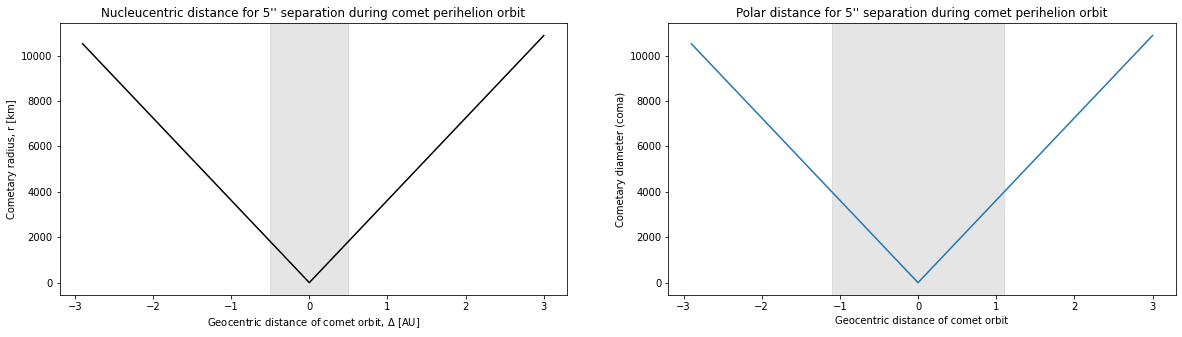

In [ ]:
# map angular size with geocentric distance
def distance_km(D, angular_size):
    # separation distance
    r = np.abs(D * np.tan(angular_size.to(u.rad)))
    return r.to(u.km)

# geocentric distance from 3AU to 0.5AU
D = np.arange(3, -3, -0.1) * u.au

# assuming 5'' resolution for MeerKAT @ 1665MHz
# nucleocentric distance, r = 5''
rho = 5. * u.arcsec
# nucleocentric distance
r_km = distance_km(D, rho)

plt.figure
fig, [ax0, ax1] = plt.subplots(nrows=1, ncols=2,
                               figsize=(20, 5),  # W x H
                               facecolor='white')
ax0.plot(D, r_km, 'k')
dist_lim = np.nonzero(r_km.value<2000.)[0]
ax0.axvspan(D[dist_lim[0]].value, D[dist_lim[-1]].value, alpha=0.2, color='grey')
ax0.set_title("Nucleucentric distance for 5'' separation during comet perihelion orbit")
ax0.set_ylabel('Cometary radius, r [km]')
ax0.set_xlabel(f'Geocentric distance of comet orbit, $\Delta$ [AU]')

resolve_dist = np.max([D[dist_lim[0]].value, D[dist_lim[-1]].value])
print(f'MeerKAT will start resolving masers with nucleocentric distance < 2000 [km] at geocentric distance {resolve_dist:.2} [AU]')


# angular separation between poles 2*r = 5''
d = 5. * u.arcsec
# cometary polar separation
d_km = distance_km(D, d)
ax1.plot(D, d_km)
dist_lim = np.nonzero(d_km.value<4000.)[0]
ax1.axvspan(D[dist_lim[0]].value, D[dist_lim[-1]].value, alpha=0.2, color='grey')
ax1.set_title("Polar distance for 5'' separation during comet perihelion orbit")
ax1.set_ylabel('Cometary diameter (coma)')
ax1.set_xlabel('Geocentric distance of comet orbit')

resolve_dist = np.max([D[dist_lim[0]].value, D[dist_lim[-1]].value])
print(f'MeerKAT will start resolving N-S masers with polar separation distance < 2000 [km] at geocentric distance {resolve_dist:.2} [AU]')

plt.show()

# MeerKAT resolution and sensitivity

The MeerKAT correlator channelizes the observation bandwidth into a number of resolution channels depending on mode.
The MeerKAT narrow band mode outputs both full band data, as well as narrow $107\,$MHz bandwidth observational data.
All MeerKAT observations are therefore inherently spectral observations, including those intended for continuum imaging.

Putting this definition into mathematical terms:
$S(\nu) = S_c + S_\ell(\nu, \nu_0, A, \Delta\nu)$, with $\Delta\nu \ll \nu_0$   
Here $S(\nu)$ is the observed spectral energy distribution [Jy] at frequency $\nu$ [Hz],
$S_c$ is the continuum component of the spectral energy distribution [Jy] and 
$S_\ell$ is the line component of the distribution [Jy].   
$S_\ell$ is a function that rapidly changes with frequency $\nu$ and is characterized by the amplitude ($A$) [Jy], central frequency $\nu_o$ [Hz] and width of the spectral line $\Delta \nu$ [Hz].

Wideband (continuum) sensitivity can be seen as the "instantaneous" imaging sensitivity.
The broader the band the better the theoretical sensitivity.
Thus, having wideband $856\,$MHz data for calibration vs using only the narrow band $107\,$MHz total bandwidth will give approximately $3\times$ improvement in sensitivity:
$\frac{\sigma_{nb}}{\sigma_{cont}} = \sqrt{\frac{856}{107}} \approx 2.8$

Spatial-frequency coverage and imaging properties change with frequency:

* Angular-resolution increases at higher frequencies
* Sensitivity to large scales decreases at higher frequencies
* Wideband UV-covergae has few gaps and lower PSF sidelobe levels

Spectral line imaging:
* Image and deconvolve each channel separately (add them to form a continuum image).
* During image-restoration, convolve mages from all channels with a common 'restoring beam' derived from the angular-resolution allowed by the lowest-frequency.
* Source spectra can be derived from the smoothed restored images (at low angular resolution)
* Imaging-fidelity is limited to the single-frequency UV-coverage
 * Reconstructions may not be consistent across frequency
* Imaging sensitivity is limited to the single-channel sensitivity $\sigma_{chan} = \sigma_{cont} \cdot \sqrt{N_{chan}}$
 * Will not deconvolve sources that are below $\sigma_{chan}$ but above $\sigma_{cont}$


## Spectral resolution

Spectral resolution for MeerKAT wideband and spectral line modes = $\Delta v \approx \Delta f \frac{c}{f}$
with $\Delta v$ the velocity span (km/s), $\Delta f$ the channel width, $f$ the centre frequency and $c$ the speed of light in a vacuum.




In [ ]:
def velocity_resolution(bw, fc, nc):
    # channel width
    df = bw.to(u.Hz)/nc
    # channel velocity resolution
    dv = (df*const.c/fc.to(u.Hz)).to(u.km/u.s)
    print(dv)
    print(f'Bandwidth {bw} over {nc} channels for channel width {dv:.3f} at {fc}')

# wideband (c856M4k)
velocity_resolution(bw=856.*u.MHz,
                    fc=1284.*u.MHz,
                    nc=4096)

# wideband (c856M4k)
velocity_resolution(bw=856.*u.MHz,
                    fc=1284.*u.MHz,
                    nc=32768)

# spectral line (c856M32k_n107M)
velocity_resolution(bw=107.*u.MHz,
                    fc=1.6654*u.GHz,
                    nc=32768)

48.79434537760417 km / s
Bandwidth 856.0 MHz over 4096 channels for channel width 48.794 km / s at 1284.0 MHz
6.099293172200521 km / s
Bandwidth 856.0 MHz over 32768 channels for channel width 6.099 km / s at 1284.0 MHz
0.5878086670698833 km / s
Bandwidth 107.0 MHz over 32768 channels for channel width 0.588 km / s at 1.6654 GHz


Spectral velocity resoltuion of $0.5\,$km/s for the MeerKAT narrow band mode can easilty resolve the anticipated 3km/s (>2km/s) line width of the cometary masers.
Spectral imaging will result in 6 channel averaging to image a $3\,$km/s line.

In [ ]:
print(f'Nchans={32768//6+1} for spectral line image of 3km/s line')

Nchans=5462 for spectral line image of 3km/s line


\begin{align*}
\frac{\Delta\nu}{\Delta V } = \frac{\nu_\mathrm{OH}}{c} 
\end{align*}

$\nu_\mathrm{OH} = 1665. \,\mathrm{MHz}$: OH maser main line frequecy

$c = 2.99792456\cdot 10^5\, \mathrm{km}\,\mathrm{s}^{-1}$: Speed of light

$\Delta \nu$: Difference between observed and rest frequency

$\Delta V$: Difference in recession velocity (between two adjacent channels)

We obtain (for a bandwidth of 856 MHz and 32768 channels):
\begin{align*}
\Delta V = 4.702\, \mathrm{km}\,\mathrm{s}^{-1}
\end{align*}

In [ ]:
f_OH = 1665.4*1e6  # OH rest frequency in Hz
Df = 8.56E8/32768  # Channel width 32k mode in Hz (Bandwidth divided by channels)
Df = Df*const.c.value/f_OH/1000.
print('32k wideband mode channel width : {0:f} km/s @ line frequency {1:.2f} MHz'
      .format(Df, f_OH/1e6))

Df = 1.07E8/32768  # Channel width 32k mode in Hz (Bandwidth divided by channels)
Df = Df*const.c.value/f_OH/1000.
print('32k narrow band mode channel width : {0:f} km/s @ line frequency {1:.2f} MHz'
      .format(Df, f_OH/1e6))

32k wideband mode channel width : 4.702469 km/s @ line frequency 1665.40 MHz
32k narrow band mode channel width : 0.587809 km/s @ line frequency 1665.40 MHz


## Spatial resolution

The FWHM of the synthesized beam (point spread function), which is the inverse Fourier transform of a (weighted) u-v sampling distribution.    
The resolution in arcsec can be approximated as: FWHM (") = 63 / max_baseline (km) / frequency (GHz)

In [ ]:
# FWHM (") = 63.073366 / max_baseline (km) / frequency (GHz)
bmax=7.7*u.km
fc=1.284*u.GHz
FWHMsb = 63.073366 / bmax.value / fc.value * u.arcsec
print(f'MeerKAT Resolution @ {fc} = {FWHMsb:.3}')

fc=1.6654*u.GHz
#FWHMsb = ((1.02 * 3600. * 180./np.pi * const.c.value / (1000.*1e9)) / bmax.value / fc.value) * u.arcsec
FWHMsb = 63.073366 / bmax.value / fc.value * u.arcsec
print(f'MeerKAT Resolution @ {fc} = {FWHMsb:.3}')

MeerKAT Resolution @ 1.284 GHz = 6.38 arcsec
MeerKAT Resolution @ 1.6654 GHz = 4.92 arcsec


In [ ]:
def spatial_resolution(fc,
                       bmax=7.7*u.km):
    wavelength = fc.to(u.nm, equivalencies=u.spectral())
    baseline = bmax.to(u.m)/wavelength.to(u.m)
    FWHMsb = 1.02/baseline * u.rad.to(u.arcsec) * u.arcsec
    print(f'MeerKAT Resolution @ {fc} = {FWHMsb:.3}')

spatial_resolution(fc=1284.*u.MHz)
spatial_resolution(fc=1.6654*u.GHz)

MeerKAT Resolution @ 1284.0 MHz = 6.38 arcsec
MeerKAT Resolution @ 1.6654 GHz = 4.92 arcsec


## Point source sensitivity

Use radiometer equation to estimate detectability

The theoretical thermal rms intensity-sensitivity $\sigma_\mathrm{S}$ of a (naturally-weighted) image is found using 
\begin{align*}\sigma_\mathrm{S} = \frac{2 k_\mathrm{B} T_\mathrm{sys}}{A_\mathrm{eff} \sqrt{N_\mathrm{p} N_\mathrm{a}(N_\mathrm{a}-1) \Delta\nu \Delta t}}\ \mathrm{[mJy/beam]}
\end{align*}

with $k_\mathrm{B}$ the Boltzmann-constant,
$T_\mathrm{sys}$ the system temperature,   
$A_\mathrm{eff} = \eta_a A$ the effective aperture of an antenna, assuming apperture efficiency $\eta_a$ at frequency $\nu$,    
$N_\mathrm{p}$ the number of polarisations [$N_\mathrm{p}=2$ for images in Stokes I, Q, U or V],    
$N_\mathrm{a}$ the number of antennas,    
$\Delta\nu$ the RF observation bandwidth [Hz] for continuum or channel width/FWHM of line for spectral line imaging and    
$\Delta t$ the total on target integration time [sec].

The equations are from http://www.atnf.csiro.au/people/Tobias.Westmeier/tools_hihelpers.php, or https://ui.adsabs.harvard.edu/abs/2013tra..book.....W/abstract, respectively.

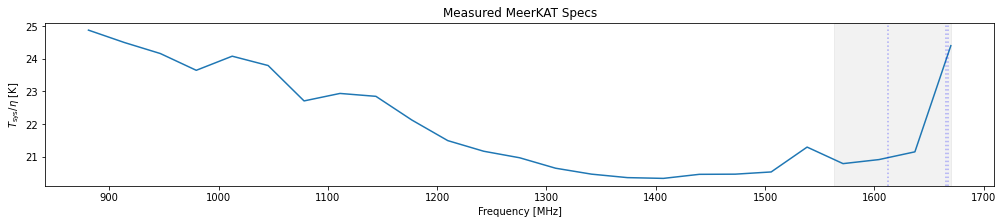

In [ ]:
# Fitted values from recent work.
specs = np.array([[ 881.           ,24.87730995],
     [ 913.875        ,24.49771763],
     [ 946.75         ,24.16024859],
     [ 979.625        ,23.64646727],
     [1012.5          ,24.07896985],
     [1045.375        ,23.79283849],
     [1078.25         ,22.70843003],
     [1111.125        ,22.93770384],
     [1144.           ,22.84885476],
     [1176.875        ,22.12287765],
     [1209.75         ,21.49206455],
     [1242.625        ,21.16654511],
     [1275.5          ,20.96656328],
     [1308.375        ,20.6466135 ],
     [1341.25         ,20.46467585],
     [1374.125        ,20.35819618],
     [1407.           ,20.33486544],
     [1439.875        ,20.45917325],
     [1472.75         ,20.46422681],
     [1505.625        ,20.53214192],
     [1538.5          ,21.29373981],
     [1571.375        ,20.78716734],
     [1604.25         ,20.91109069],
     [1637.125        ,21.14846713],
     [1670.           ,24.40091906]])

fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(17, 3),
                       facecolor='white')
ax.plot(specs[:,0],specs[:,1])
ax.axvspan(1563.0, 1670., alpha=0.05, color='k')
ax.axvline(x=1612.2, color='b', linestyle=':', alpha=0.3)
ax.axvline(x=1665.4, color='b', linestyle=':', alpha=0.3)
ax.axvline(x=1667.4, color='b', linestyle=':', alpha=0.3)
ax.set_title('Measured MeerKAT Specs')
ax.set_ylabel('$T_\mathrm{sys}/\eta$ [K]')
i=ax.set_xlabel('Frequency [MHz]')
plt.show()

In [ ]:
f = specs[:,0]*1e6  # frequency axis above in Hz
Tsys_eta = specs[:,1]
obs_freq = 1665.4*1e6  # OH rest frequency in Hz

idx_ = np.argmin(np.abs(f - obs_freq))
# fit with a second degree polynomial
x = f[idx_-1:idx_+2]
y = Tsys_eta[idx_-1:idx_+2]
if len(x) < 3: p_o = 1
else: p_o = 2
c2p = np.polyfit(x, y, p_o) 
p2 = np.poly1d(c2p)
Tsys_per_eta = p2(obs_freq)

Broadband receivers increase the "instantaneous" imaging sensitivity of an instrument.    
\begin{align*}\sigma_\mathrm{wb} \propto \frac{T_\mathrm{sys}}{\sqrt{N_\mathrm{a}(N_\mathrm{a}-1) \Delta\nu_\mathrm{ RF} \Delta t}}
\end{align*}

Using MeerKAT narrowband mode will decrease the instantaneous bandwidth form 856MHz to 107MHz.
The theoretical loss of sensitivity moving to the narrower bandwidth is $\sqrt{\frac{856\,\mathrm{MHz}}{107\,\mathrm{MHz}}}$, a factor 2.8 times decrease in sensitivity for the same integration time $\Delta t$.
In essence we are using one third or the bandwidth and therefore need 3 times longer integration time to achieve the wideband sensitivity.
\begin{align*}\sigma_\mathrm{nb} \approx \sqrt{8} \times \sigma_\mathrm{wb}
\end{align*}

For spectral line image the sensitivity requirements are even more stringent since each channel is deconvolved and imaged separately to form an image cube.
(The individual channel images can be added to form a continuum image)
Since the FWHM of the synthesized beam (PSF) is simply the inverse Fourier transform of a (weighted) UV sampling distribution, spectral line image fidelity is limited by the sparse sampling of a single frequency channel UV coverage.
And the image sensitiviy is limited to the single channel sensitivity:
\begin{align*}
\sigma_\mathrm{sp} \propto \frac{T_\mathrm{sys}}{\sqrt{N_\mathrm{a}(N_\mathrm{a}-1) \Delta\nu_\mathrm{chan} \Delta t}}
\end{align*}
\begin{align*}
\Delta\nu_\mathrm{chan} = \Delta\nu_\mathrm{RF} / N_\mathrm{chans}
\end{align*}
\begin{align*}
\sigma_\mathrm{sp} = \sigma_\mathrm{nb} \sqrt{N_\mathrm{chans}} \approx 74 \times \sigma_\mathrm{nb} \approx 222 \times \sigma_\mathrm{wb}
\end{align*}


In [ ]:
boltz_k = const.k_B.value*1e7  # k=J/K => *e7 ergs/K
D = 13.5  # m
A = np.pi * (D/2)**2  # m^2
N = 58 # nr of antennas
NPol = 2

hours = 1.
dt = 3600. * hours  # on source integration time
# intensity from brightness temperature [erg/s/cm^2/Hz/sr]
Jy = 1e23  # [erg/s/cm^2/Hz]

print("Thermal rms in intensity using the radiometer equation:")
wbw = 856e6  # Hz
SNRwb = ((2. * boltz_k * Tsys_per_eta) / (A * np.sqrt(NPol * N * (N-1) * wbw * dt))) * Jy
print(f"Natural rms after {hours:.1f}h on-source, over instananeous bandwidth {wbw/1e6:.1f} MHz, is {SNRwb*1e3:2.4g} mJy/beam.") 

nbw = 107e6  # Hz
SNRnb = ((2. * boltz_k * Tsys_per_eta) / (A * np.sqrt(NPol * N * (N-1) * nbw * dt))) * Jy
print(f"Natural rms after {hours:.1f}h on-source, over instananeous bandwidth {nbw/1e6:.1f} MHz, is {SNRnb*1e3:2.4g} mJy/beam.") 
print(f'SNRnb = 2.83*SNRwb = {2.83*SNRwb*1e3:2.4g} mJy/beam')

Thermal rms in intensity using the radiometer equation:
Natural rms after 1.0h on-source, over instananeous bandwidth 856.0 MHz, is 32.36 mJy/beam.
Natural rms after 1.0h on-source, over instananeous bandwidth 107.0 MHz, is 91.53 mJy/beam.
SNRnb = 2.83*SNRwb = 91.58 mJy/beam


In [ ]:
velocity_width = 3.0  # in km/s
nchans = 5462  # 32768/6 for 3km/s velocity width
spbw = nbw/nchans  # Hz
SNRsp = ((2. * boltz_k * Tsys_per_eta) / (A * np.sqrt(NPol * N * (N-1) * spbw * dt))) * Jy
print(f"Approx rms after {hours:.1f}h on-source per 6 channel average, is {SNRsp:2.4g} Jy/beam.") 
print(f'SNRnb = 222*SNRwb = {3*74*SNRwb:2.4g} Jy/beam')

fc = 1.6654*u.GHz
dv = 3.0 * (u.km/u.s)
#bw = f_OH/const.c.value*velocity_width*1000.
bw = dv * fc.to(u.Hz) / const.c.to(u.km/u.s)
SNRsp = ((2. * boltz_k * Tsys_per_eta) / (A * np.sqrt(NPol * N * (N-1) * bw.value * dt))) * Jy
print(f"Natural rms after {hours:.1f}h on-source, over a velocity width of {velocity_width:2.4g} km/s, is {SNRsp:2.4g} Jy/beam.") 

Approx rms after 1.0h on-source per 6 channel average, is 6.765 Jy/beam.
SNRnb = 222*SNRwb = 7.184 Jy/beam
Natural rms after 1.0h on-source, over a velocity width of  3 km/s, is 7.334 Jy/beam.


In [ ]:
print ("T_sys/eta at %3.0f MHz is %2.1fK"%(obs_freq/1e6, Tsys_per_eta) )
Smin = 0.05  # Jy/beam
newconst = (2. * boltz_k * Tsys_per_eta * Jy) / (A * np.sqrt(NPol * N * (N-1) * wbw))
sqrt_dt = newconst / Smin
taumin = sqrt_dt*sqrt_dt
print(f'To achieve flux of {Smin} [Jy/beam] over {wbw/1e6:.1f} MHz bandwidth, requires integration time {taumin:.0f}s or {taumin/3600.:.2f}h')
newconst = (2. * boltz_k * Tsys_per_eta * Jy) / (A * np.sqrt(NPol * N * (N-1) * nbw))
sqrt_dt = newconst / Smin
taumin = sqrt_dt*sqrt_dt
print(f'To achieve flux of {Smin} [Jy/beam] over {nbw/1e6:.1f} MHz bandwidth, requires integration time {taumin:.0f}s or {taumin/3600.:.2f}h')
newconst = (2. * boltz_k * Tsys_per_eta * Jy) / (A * np.sqrt(NPol * N * (N-1) * spbw))
sqrt_dt = newconst / Smin
taumin = sqrt_dt*sqrt_dt
print(f'To achieve flux of {Smin} [Jy/beam] over {spbw/1e3:.1f} kHz bandwidth, requires integration time {taumin:.0f}s or {taumin/3600.:.2f}h')

print()

Smax = 0.2  # Jy/beam
newconst = (2. * boltz_k * Tsys_per_eta * Jy) / (A * np.sqrt(NPol * N * (N-1) * wbw))
sqrt_dt = newconst / Smax
taumin = sqrt_dt*sqrt_dt
print(f'To achieve flux of {Smax} [Jy/beam] over {wbw/1e6:.1f} MHz bandwidth, requires integration time {taumin:.0f}s or {taumin/3600.:.2f}h')
newconst = (2. * boltz_k * Tsys_per_eta * Jy) / (A * np.sqrt(NPol * N * (N-1) * nbw))
sqrt_dt = newconst / Smax
taumin = sqrt_dt*sqrt_dt
print(f'To achieve flux of {Smax} [Jy/beam] over {nbw/1e6:.1f} MHz bandwidth, requires integration time {taumin:.0f}s or {taumin/3600.:.2f}h')
newconst = (2. * boltz_k * Tsys_per_eta * Jy) / (A * np.sqrt(NPol * N * (N-1) * spbw))
sqrt_dt = newconst / Smax
taumin = sqrt_dt*sqrt_dt
print(f'To achieve flux of {Smax} [Jy/beam] over {spbw/1e3:.1f} kHz bandwidth, requires integration time {taumin:.0f}s or {taumin/3600.:.2f}h')


T_sys/eta at 1665 MHz is 23.9K
To achieve flux of 0.05 [Jy/beam] over 856.0 MHz bandwidth, requires integration time 1508s or 0.42h
To achieve flux of 0.05 [Jy/beam] over 107.0 MHz bandwidth, requires integration time 12065s or 3.35h
To achieve flux of 0.05 [Jy/beam] over 19.6 kHz bandwidth, requires integration time 65897103s or 18304.75h

To achieve flux of 0.2 [Jy/beam] over 856.0 MHz bandwidth, requires integration time 94s or 0.03h
To achieve flux of 0.2 [Jy/beam] over 107.0 MHz bandwidth, requires integration time 754s or 0.21h
To achieve flux of 0.2 [Jy/beam] over 19.6 kHz bandwidth, requires integration time 4118569s or 1144.05h


The beam-averaged brightness temperature measured by a given array depends on the synthesized beam, and is related to the flux density per beam:
\begin{align*}
 T_\mathrm{B} = \frac{\lambda^2S_\nu}{2k_\mathrm{B}\Omega_\mathrm{bm}}
\end{align*}
\begin{align*}
 \frac{T_\mathrm{B}}{\mathrm{K}} \approx 1.360 \times \left(\frac{\lambda}{\mathrm{cm}} \right)^2 \times \frac{S_\nu}{\mathrm{mJy}} \times \frac{1}{\vartheta^2}
\end{align*}
At OH frequency 1.665 GHz
$\frac{T_\mathrm{B}}{K} \approx 440.633 \times \frac{S_\nu}{\mathrm{mJy}} \times \frac{1}{\vartheta^2}$

\begin{align*}
 T_\mathrm{B} = \frac{441 \, S}{\vartheta^{2}} = F \cdot S
\end{align*}
In this equation, the *HPBW* $\vartheta$ of the synthesized beam is measured in arcseconds, and the flux density $S$ is measured in mJy, to calculate the brightness temperature $T_\mathrm{B}$.

Angular size of a Gaussian beam $\sim \frac{1.5\lambda}{B\mathrm{max}}$.    
The brightness temperature sensitivity can be obtained by substituting the RMS noise, $\sigma_s$, for $S$.

We can then calculate the OH-column density $N_\mathrm{OH}$ by integrating over the OH linewidth (measured in $\mathrm{km}\,\mathrm{s}^{-1}$):
\begin{align*}
N_{\rm OH} = 8.9 \times 10^{12} \! \int \! T_{\rm B} \, \mathrm{d}V          
 \end{align*}

 \begin{align*}
N_{\rm OH} \approx 8.9 \times 10^{12} \cdot (T_{\rm B} \Delta v)          
 \end{align*}
  \begin{align*}
S \approx N_{\rm OH} \ \vartheta^2 \  / \ (8.9 \times 10^{12} * 441 * \Delta v)          
 \end{align*}

In [ ]:
F_tap = 1.6  # The Robust/tapering factor.
theta = 60.  # The synthesized beam HPBW in arcseconds  
SN = 1.5  #5.  # Signal to Noise for detection
N_oh = 4.1e12  # Target OH column Density in cm^{-2}
velocity_width = 3.  # in km/s
f_OH = 1665.4*1e6  # OH rest frequency in Hz
J = 1e26  # Jy to Watts conversion factor
D = 13.5  # m
NPol = 2
A = np.pi * (D/2)**2
N = 58  # nr antennas

col_flux = N_oh*theta**2/(8.9e12*441.*velocity_width)
rmsmin = col_flux/(F_tap*SN)  # mJy/beam

print('Intensity corresponding to an HI column density:\n')
string1 = 'OH'\
            ' with a column density of N_oh = {0:2.4g},\n'\
            '   observed at {1} arcseconds resolution (HPBW),\n'\
            '   with a velocity width of {2:2.4g} km/s,\n'\
            '   is observed with an intensity of {3:2.4g} mJy/beam.\n'
string2 = 'To detect this\n'\
            '   at a {1:.0f}-sigma level (taper factor of {2:2.2g}),\n'\
            '   we require a data cube with a natural rms of {3:2.4g} mJy/beam\n'\
            '   (after regridding to {4:2.4g} km/s-wide channels).\n'
print(string1.format(N_oh, theta, velocity_width, col_flux))
print(string2.format(N_oh, SN, F_tap, rmsmin, velocity_width))

Intensity corresponding to an HI column density:

OH with a column density of N_oh = 4.1e+12,
   observed at 60.0 arcseconds resolution (HPBW),
   with a velocity width of  3 km/s,
   is observed with an intensity of 1.254 mJy/beam.

To detect this
   at a 2-sigma level (taper factor of 1.6),
   we require a data cube with a natural rms of 0.5223 mJy/beam
   (after regridding to  3 km/s-wide channels).



In [ ]:
Tb = 441. * col_flux / theta**2
print(f'Brightness temperature T = {Tb*1000.:.3f} [mK] for column flux density S = {col_flux:.5f} [mJy/beam]')
Tb = 441. * rmsmin / theta**2
print(f'Brightness temperature T = {Tb*1000.:.3f} [mK] for column flux density S = {rmsmin:.5f} [mJy/beam]')

Brightness temperature T = 153.558 [mK] for column flux density S = 1.25354 [mJy/beam]
Brightness temperature T = 63.983 [mK] for column flux density S = 0.52231 [mJy/beam]


In [ ]:
bw = f_OH/const.c.value*velocity_width*1000.
#bw = 856e6  # Hz
Tsys_per_eta = Tsys_eta[np.argmin(np.abs(f - obs_freq))]
taumin = np.power((2 * const.k_B.value * Tsys_per_eta * J)/(A * (rmsmin/1000.) * np.sqrt(NPol)),2)/(N * (N-1) * bw)
print ("T_sys/eta at %3.0f MHz is %2.1fK"%(obs_freq/1e6,Tsys_per_eta) )
print('   With this, to reach the required rms level, the required integration time is\n'\
        '   {0:.0f}s or {1:.2f}h.'.format(taumin, taumin/3600.))

T_sys/eta at 1665 MHz is 24.4K
   With this, to reach the required rms level, the required integration time is
   7371s or 2.05h.


In [ ]:
# bw = f_OH/const.c.value*velocity_width*1000.
bw = 107e6  # Hz
Tsys_per_eta = Tsys_eta[np.argmin(np.abs(f - obs_freq))]
taumin = np.power((2 * const.k_B.value * Tsys_per_eta * J)/(A * (rmsmin/1000.) * np.sqrt(NPol)),2)/(N * (N-1) * bw)
print ("T_sys/eta at %3.0f MHz is %2.1fK"%(obs_freq/1e6,Tsys_per_eta) )
print('   With this, to reach the required rms level, the required integration time is\n'\
        '   {0:.0f}s or {1:.2f}h.'.format(taumin, taumin/3600.))

T_sys/eta at 1665 MHz is 24.4K
   With this, to reach the required rms level, the required integration time is
   1s or 0.00h.


For an interferometer, the noise level in the resulting data cubes (expressed in mJy) scales roughly as $S = (k*T_{sys})(A*N^2(N_p*\Delta\nu * \Delta t)^{1/2})^{-1}$, where $T_sys$ is the system temperature, $A$ is the area of each antenna, $N$ is the number of antennas, $N_p$ is the number of polarizations, $\Delta\nu$ is the available bandwidth and $\Delta t$ is the observing time. For continuum observations, $\Delta\nu$ is the full observation bandwidth, for spectral line observations, $\Delta\nu$ is the channel width/ line width.

In [ ]:
f_OH = 1665.4*1e6  # OH rest frequency in Hz
Df = 8.56E8/32768  # Channel width 32k mode in Hz (Bandwidth divided by channels)
print(Df, 'Hz')
Df = Df*const.c.value/f_OH/1000.
print('32k wideband mode channel width : {0:f} km/s @ line frequency {1:.2f} MHz'
      .format(Df, f_OH/1e6))

Df=4.702469  # km/s
Df = 6  # km/s
print(Df, 'km/s')
Df = Df*1000.*f_OH/const.c.value
print(Df, 'Hz')

26123.046875 Hz
32k wideband mode channel width : 4.702469 km/s @ line frequency 1665.40 MHz
6 km/s
33331.05864858015 Hz


Sensitivity calculations assuming mK -- gives microJy values -- we will not detect that so if the line is that weak, -- so assuming 4mJy

In [ ]:
taumin = 9099.90*3600.
print(taumin/3600., 'hrs')
print(taumin/(3600.*24.), 'days')
print(taumin/(3600.*24.*30.), 'months')

9099.9 hrs
379.1625 days
12.63875 months


In [ ]:
print(rmsmin, 'mJy/beam')
rmsmin = 0.004
print(rmsmin, 'mJy/beam')
Df = 8.56E8/32768  # Channel width 32k mode in Hz (Bandwidth divided by channels)
Df = Df*const.c.value/f_OH/1000.
#Df = 9  # km/s
print(Df, 'km/s')
bw = Df*1000.*f_OH/const.c.value
print(bw, 'Hz')# bw = f_OH/const.c.value*velocity_width*1000.
#bw = 33331  # Hz
Tsys_per_eta = Tsys_eta[np.argmin(np.abs(f - obs_freq))]
taumin = np.power((2 * const.k_B.value * Tsys_per_eta * J)/(A * (rmsmin/1000.) * np.sqrt(NPol)),2)/(N * (N-1) * bw)
print ("T_sys/eta at %3.0f MHz is %2.1fK"%(obs_freq/1e6,Tsys_per_eta) )
print('   With this, to reach the required rms level, the required integration time is\n'\
        '   {0:.0f}s or {1:.2f}h.'.format(taumin, taumin/3600.))

print(taumin/3600., 'hrs')
print(taumin/(3600.*24.), 'days')
print(taumin/(3600.*24.*30.), 'months')

0.5223063007974724 mJy/beam
0.004 mJy/beam
4.702469336559067 km/s
26123.046875000004 Hz
T_sys/eta at 1665 MHz is 24.4K
   With this, to reach the required rms level, the required integration time is
   80176562s or 22271.27h.
22271.267312738055 hrs
927.9694713640856 days
30.932315712136187 months


In [ ]:
Smax = 0.004  # Jy/beam
newconst = (2. * boltz_k * Tsys_per_eta * Jy) / (A * np.sqrt(NPol * N * (N-1) * wbw))
sqrt_dt = newconst / Smax
taumin = sqrt_dt*sqrt_dt
print(f'To achieve flux of {Smax} [Jy/beam] over {wbw/1e6:.1f} MHz bandwidth, requires integration time {taumin:.0f}s or {taumin/3600.:.2f}h')
newconst = (2. * boltz_k * Tsys_per_eta * Jy) / (A * np.sqrt(NPol * N * (N-1) * nbw))
sqrt_dt = newconst / Smax
taumin = sqrt_dt*sqrt_dt
print(f'To achieve flux of {Smax} [Jy/beam] over {nbw/1e6:.1f} MHz bandwidth, requires integration time {taumin:.0f}s or {taumin/3600.:.2f}h')
newconst = (2. * boltz_k * Tsys_per_eta * Jy) / (A * np.sqrt(NPol * N * (N-1) * spbw))
sqrt_dt = newconst / Smax
taumin = sqrt_dt*sqrt_dt
print(f'To achieve flux of {Smax} [Jy/beam] over {spbw/1e3:.1f} kHz bandwidth, requires integration time {taumin:.0f}s or {taumin/3600.:.2f}h')


To achieve flux of 0.004 [Jy/beam] over 856.0 MHz bandwidth, requires integration time 244679s or 67.97h
To achieve flux of 0.004 [Jy/beam] over 107.0 MHz bandwidth, requires integration time 1957436s or 543.73h
To achieve flux of 0.004 [Jy/beam] over 19.6 kHz bandwidth, requires integration time 10691513267s or 2969864.80h


For calibration the 32k wide will give the best and quickest calibration/imaging solution, but narrow band only comes with 4k wide output along with the 32k narrow -- the channelisation for that is to wide

(conservative approach)
Using the imaging mode means we can schedule shorter 1h observations, filler observations. And to these frequently, which means we build up the data we need, the inversion of the line happens over weeks, so we can accumulate the data.
Also, it is a more standard mode, so easier to accept and schedule.
There are pipelines that can be used and standard flagging and calibration methods can be applied quickly.

Once we have detection or close to perihelion -- which ever comes first, we can switch to narrowband mode to get the velocity resolution we need.